If $A$ is an $m \times n$  matrix, one can always find a decomposition such that,

$$A = U\Sigma V^*$$
Where $U$ is an $m \times m$ unitay matrix, $\Sigma$ is an $m \times n$ diagonal matrix, and $V$ is an $n \times n$ unitary matrix.  This is called the full singular value decomposition and is whta is returned by default in both Numpy and MATLAB  The star in the above equation means transpose.

## Difference between Numpy and MATLAB

the matlab command, [U, S, V] = svd(X) computes the matrices $U$, $\Sigma$ and $V$.  It does not return the transpose of $V$.  In other words, to get back the martix $X$ given the other three matrices, one would use the command:

U * S * V'

Also, MATLAB returns $\Sigma$ as a matrix.

Nump's U, S, Vt = np.linalg.svd(X) automatically returns the transpose of $V$.  Also, rather than a full matrix, $\Sigma$ is returned as a 1-d array containing the diagonal elements of the matrix.  Care must be taken to cast this is the right shape when making use of it in matrix computations.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  Demo with a small matrix

Procedure to recreate orginal matrix

1)  Run svd commandL  U, S, Vt = svd(X)<br>
2)  Build $\Sigma$ matrix. Since $S$ is a 1-d array, we create a matrix of zeros with the same shape as oue input matrix X, then loop over the elemnts of $S$ populating the diagonal of $\Sigma

In [3]:
#  Define and print out a simple matrix
X = np.array([ [1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])
print('Original matrix:')
print(X)
print()

#  Do singular value decomposition
U, S, Vt = np.linalg.svd(X)

print('U:'); print(U); print()
print('S:');print(S); print()
print('Vt:'); print(Vt)

Original matrix:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]

U:
[[-0.20166491  0.89031713  0.40824829]
 [-0.5168305   0.25733163 -0.81649658]
 [-0.83199609 -0.37565388  0.40824829]]

S:
[3.51272233e+01 2.46539670e+00 4.25506946e-16]

Vt:
[[-0.35455706 -0.39869637 -0.44283568 -0.486975   -0.53111431]
 [-0.68868664 -0.37555453 -0.06242242  0.2507097   0.56384181]
 [-0.47797426  0.78078356 -0.30805703  0.18566038 -0.18041267]
 [-0.29474968 -0.16018856  0.62952007  0.40052429 -0.57510611]
 [-0.29096948  0.25439468  0.55570258 -0.71071128  0.1915835 ]]


In [5]:

#  Building our sigma matrix.  We start with a zeros matrix the same shape as X
sigma = np.zeros_like(X, dtype = float)

#  Loop over S and put the values along the diagonal of sigma
for i in range(S.size):
    sigma[i,i] = S[i]
    
print('Sigma:')
print(sigma)

#  test to see if we can recreate our original matrix
print( np.matmul( np.matmul(U, sigma), Vt ) )

Sigma:
[[3.51272233e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.46539670e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.25506946e-16 0.00000000e+00
  0.00000000e+00]]
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]


##  Equivalent MATLAB Code

clear all; clc; close all;

X = [ [1 2 3 4 5]; [6 7 8 9 10]; [11 12 13 14 15]]

[U, S, V] = svd(X)

U * S *V'

##  Image Compression Using SVD

(3036, 4048, 3)


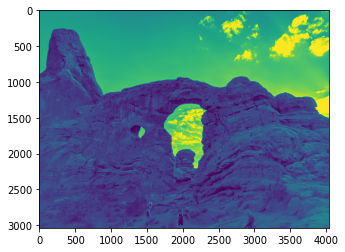

In [6]:
#  Import image and convert to black and white
image = cv2.imread('IMG_20180805_190645.jpg')
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#  Display image
plt.imshow(image)

In [7]:
#  Do SVD
U, S, Vt = np.linalg.svd(image)

(3036, 3036)
(3036,)
(4048, 4048)


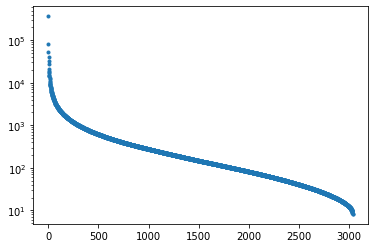

In [32]:
#  Print shapes of returned matrices
print(U.shape)
print(S.shape)
print(Vt.shape)

#  Plot the singualr values.  Notice the are ordered from highest to lowest
plt.semilogy(S, '.')

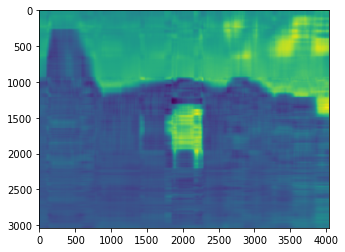

In [8]:
#  We are only going to keep the first N modes
N = 10

#  Truncate the U and Vt matrices
U_trunc = U[:, 0:N]
Vt_trunc = Vt[0:N, :]

#  Because we are only keeping a small number of singular values, we don't have to do the same thing as above.  We can get away with 
#  Using the diag command to create a square diagonal matrix.
sigma = np.diag(S[0:N], 0)

#  Build the image and display it
I = np.matmul( np.matmul(U_trunc, sigma), Vt_trunc)
plt.imshow(I)

##  Equivalent Code in MATLAB

clear all; close all; clc;

%  Load in image and convert to black and whie
image = imread('IMG_20180805_190645.jpg');
image = rgb2gray(image);
image = im2double(image);

%  Display the original image
imshow(image)

%  Do SVD
[U, S, V] = svd(image);

%  Build the image from our truncated matrices
N = 100;
M = U(:, 1:N) * S(1:N, 1:N) * V(:, 1:N)';

% Display the image
figure();
imshow(M);

##  Subset of SVD:  The SVDS command
In python, this is part of the scipy.sparse.linalgpackage  It will only return a specified number of modes and tends to run faster.

This is often the better choise if you know how many singular values you need.

note:  The code below needs to recast the mastix as floats.

In [14]:
from scipy.sparse.linalg import svds

In [12]:
#  Do SVDS
U, S, Vt = svds(image.astype(float), k = 10)

In [13]:
#  Print the size of the returned matrices
print(U.shape)
print(S.shape)
print(Vt.shape)

(3036, 10)
(10,)
(10, 4048)


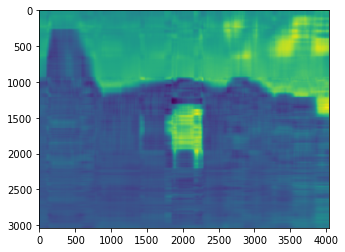

In [20]:
#  Build the sigma matrix
sigma = np.diag(S, 0)

#  Recreate the image using our truncated data.
I = np.matmul( np.matmul(U, sigma), Vt)
plt.imshow(I)